<a href="https://colab.research.google.com/github/SauleRub/DI_Bootcamp/blob/main/Week15/Day2/Dailychallenge_W9D4_dc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statsmodels.stats.api as sms
from scipy.stats import (ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu,
                         pearsonr, spearmanr, kendalltau, f_oneway, kruskal)
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multicomp import MultiComparison


In [4]:
# TODO : Import the Data from the kaggle API

import pandas as pd

# Load the CSV (you already uploaded this file)
df = pd.read_csv('AB_Test_Results (1).csv')

# Show first few rows
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


# Data Understanding

In [5]:
#TODO : compute the following : DataFrame Information, Columns in DataFrame, Counting Missing Values, Descriptive Statistics, Value Counts for VARIANT_NAME, Counting Unique Users in USER_ID

# DataFrame Information
print("🧾 DataFrame Info:")
df.info()

# Columns in DataFrame
print("\n🧱 Columns in DataFrame:")
print(df.columns.tolist())

# Counting Missing Values
print("\n❓ Missing Values per Column:")
print(df.isnull().sum())

# Descriptive Statistics
print("\n📊 Descriptive Statistics:")
print(df.describe(include='all'))

# Value Counts for VARIANT_NAME
print("\n🧪 Value Counts for VARIANT_NAME:")
print(df['VARIANT_NAME'].value_counts())

# Counting Unique Users in USER_ID
print("\n👤 Unique Users in USER_ID:")
print(df['USER_ID'].nunique())

🧾 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB

🧱 Columns in DataFrame:
['USER_ID', 'VARIANT_NAME', 'REVENUE']

❓ Missing Values per Column:
USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64

📊 Descriptive Statistics:
             USER_ID VARIANT_NAME       REVENUE
count   10000.000000        10000  10000.000000
unique           NaN            2           NaN
top              NaN      variant           NaN
freq             NaN         5016           NaN
mean     4981.080200          NaN      0.099447
std      2890.590115          NaN      2.318529
min         2.000000          NaN      0.000000
25%      2468.750000    

# Average Revenue by VARIANT_NAME

In [ ]:
#TODO

What if H0: M1 = M2 ?
What about H1: M1 1= M2 ?

# Assumptions Control:
*# 1- Normality Assumptions*
*# 2- Homogeneity of Variances Assumption*

In [6]:
# TODO : test the normality of revenue data in two groups (variant and control) within your DataFrame df using the Shapiro-Wilk test, what can you conclude ?

from scipy.stats import shapiro

# Split the data into control and variant groups
control_group = df[df['VARIANT_NAME'] == 'control']['REVENUE']
variant_group = df[df['VARIANT_NAME'] == 'variant']['REVENUE']

# Shapiro-Wilk Test for Control
shapiro_control = shapiro(control_group)
print("🧪 Shapiro-Wilk Test for CONTROL group:")
print(f"Statistic: {shapiro_control.statistic}, p-value: {shapiro_control.pvalue}")

# Shapiro-Wilk Test for Variant
shapiro_variant = shapiro(variant_group)
print("\n🧪 Shapiro-Wilk Test for VARIANT group:")
print(f"Statistic: {shapiro_variant.statistic}, p-value: {shapiro_variant.pvalue}")

🧪 Shapiro-Wilk Test for CONTROL group:
Statistic: 0.01833147442513483, p-value: 2.4983285100057203e-95

🧪 Shapiro-Wilk Test for VARIANT group:
Statistic: 0.027033073451830147, p-value: 2.7310104028899288e-95


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5016.
  res = hypotest_fun_out(*samples, **kwds)


In [7]:
# TODO : test for the homogeneity of variances between two groups (variant and control) within your DataFrame df using the Levene's test,  what can you conclude ?

from scipy.stats import levene

# Separate the revenue values for control and variant groups
control_group = df[df['VARIANT_NAME'] == 'control']['REVENUE']
variant_group = df[df['VARIANT_NAME'] == 'variant']['REVENUE']

# Perform Levene's Test
levene_stat, levene_p = levene(control_group, variant_group)

# Output results
print("📏 Levene’s Test for Equal Variance:")
print(f"Statistic: {levene_stat:.4f}, p-value: {levene_p:.4f}")

📏 Levene’s Test for Equal Variance:
Statistic: 1.6159, p-value: 0.2037


# Non-Parametric Test (mannwhitneyu Test)

In [8]:
# TODO : perform the Mann-Whitney U test for comparing the average revenue between the variant and control groups in your DataFrame, what can you conclude ?

from scipy.stats import mannwhitneyu

# Extract revenue data for both groups
control_revenue = df[df['VARIANT_NAME'] == 'control']['REVENUE']
variant_revenue = df[df['VARIANT_NAME'] == 'variant']['REVENUE']

# Perform Mann-Whitney U test (non-parametric test for independent samples)
u_stat, p_value = mannwhitneyu(control_revenue, variant_revenue, alternative='two-sided')

# Output result
print("📊 Mann-Whitney U Test Result:")
print(f"U-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

📊 Mann-Whitney U Test Result:
U-statistic: 12521564.0000
p-value: 0.4783


/tmp/ipython-input-9-2863656629.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='VARIANT_NAME', y='REVENUE', data=df, estimator='mean', ci='sd')


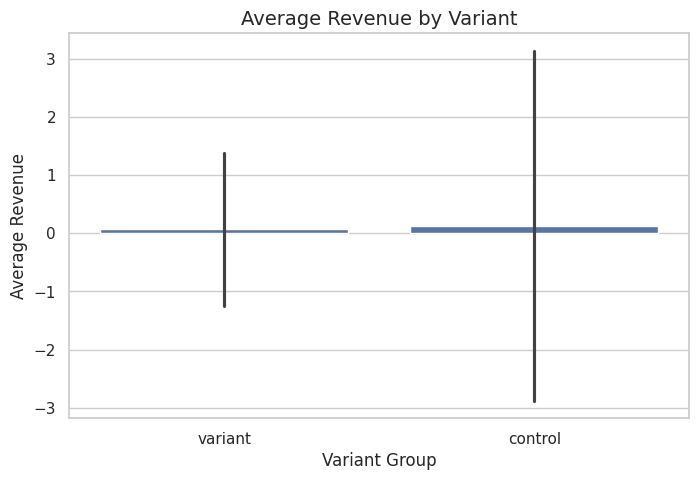

In [9]:
# TODO : create a bar plot showing the average revenues by variant names using the seaborn library

import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Create bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='VARIANT_NAME', y='REVENUE', data=df, estimator='mean', ci='sd')

# Add title and labels
plt.title('Average Revenue by Variant', fontsize=14)
plt.xlabel('Variant Group', fontsize=12)
plt.ylabel('Average Revenue', fontsize=12)
plt.show()